# Bank Customer Churn - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings

import opendatasets as od

In [2]:
# Ignore FutureWarnings only
warnings.filterwarnings("ignore", category=FutureWarning)

#Fetching data from kaggle
dataset_url = 'https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset'

od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-dataset" (use force=True to force download)


# Data Representation

In [3]:
#Load the dataset
data = pd.read_csv('bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
print(f'Dataframe dimensions: {data.shape}')
data_head = data.head(10)
print(tabulate(data_head, headers='keys', tablefmt='fancy_grid', showindex=False))

Dataframe dimensions: (10000, 12)
╒═══════════════╤════════════════╤═══════════╤══════════╤═══════╤══════════╤═══════════╤═══════════════════╤═══════════════╤═════════════════╤════════════════════╤═════════╕
│   customer_id │   credit_score │ country   │ gender   │   age │   tenure │   balance │   products_number │   credit_card │   active_member │   estimated_salary │   churn │
╞═══════════════╪════════════════╪═══════════╪══════════╪═══════╪══════════╪═══════════╪═══════════════════╪═══════════════╪═════════════════╪════════════════════╪═════════╡
│      15634602 │            619 │ France    │ Female   │    42 │        2 │       0   │                 1 │             1 │               1 │           101349   │       1 │
├───────────────┼────────────────┼───────────┼──────────┼───────┼──────────┼───────────┼───────────────────┼───────────────┼─────────────────┼────────────────────┼─────────┤
│      15647311 │            608 │ Spain     │ Female   │    41 │        1 │   83807.9 │        

- **customer_id**: Unique identifier for each customer.

- **credit_score**: The credit score of the customer [300 : 850].
 - Poor credit: 300 to 579.
 - Fair credit: 580 to 669.
 - Good credit: 670 to 739.
 - Very good credit: 740 to 799.
 - Excellent credit: 800 to 850.
- country: Country of the customer (e.g, France, Germany)

- **gender**: Gender of the customer (e.g., Female, Male)

- **age**: Age of the customer

- **tenure**: Number of years the customer has been with the bank.

- **balance**: Account balance of the customer.

- **products_number**: Number of products the customer has purchased.

- **credit_card**: Whether the customer has a credit card (1 = Yes, 0 = No).

- **active_member**: Wheter the customer is active or not(1 = Yes, 0 = No)

- **estimated_salary**: Estimated annual salary of the custoemr.

- **churn**: Whether the customer left the bank (1 = Yes, 0 = No) - target for churn prediction.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# Data Wrangling

In [5]:
# Check missing numeric values
missing_numeric = data.isnull().sum()
missing_df = pd.DataFrame(missing_numeric, columns=['Missing Values'])
print(tabulate(missing_df, headers='keys', tablefmt='fancy_grid'))

╒══════════════════╤══════════════════╕
│                  │   Missing Values │
╞══════════════════╪══════════════════╡
│ customer_id      │                0 │
├──────────────────┼──────────────────┤
│ credit_score     │                0 │
├──────────────────┼──────────────────┤
│ country          │                0 │
├──────────────────┼──────────────────┤
│ gender           │                0 │
├──────────────────┼──────────────────┤
│ age              │                0 │
├──────────────────┼──────────────────┤
│ tenure           │                0 │
├──────────────────┼──────────────────┤
│ balance          │                0 │
├──────────────────┼──────────────────┤
│ products_number  │                0 │
├──────────────────┼──────────────────┤
│ credit_card      │                0 │
├──────────────────┼──────────────────┤
│ active_member    │                0 │
├──────────────────┼──────────────────┤
│ estimated_salary │                0 │
├──────────────────┼──────────────────┤


In [6]:
#Check duplicated values
duplicated_values = data.duplicated().sum()
print(f'Duplicated values: {duplicated_values}')

Duplicated values: 0


# Exploratory Data Analysis
- The goal is to better understand the distributions of features, identify trends, and explore relationships between features and target variable.

# Univariate Analysis

In [7]:
credit_score_desc = data['credit_score'].describe()
desc_df = pd.DataFrame(credit_score_desc).reset_index()
desc_df.columns = ['Statistic', 'Value']
print(tabulate(desc_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤════════════╕
│ Statistic   │      Value │
╞═════════════╪════════════╡
│ count       │ 10000      │
├─────────────┼────────────┤
│ mean        │   650.529  │
├─────────────┼────────────┤
│ std         │    96.6533 │
├─────────────┼────────────┤
│ min         │   350      │
├─────────────┼────────────┤
│ 25%         │   584      │
├─────────────┼────────────┤
│ 50%         │   652      │
├─────────────┼────────────┤
│ 75%         │   718      │
├─────────────┼────────────┤
│ max         │   850      │
╘═════════════╧════════════╛


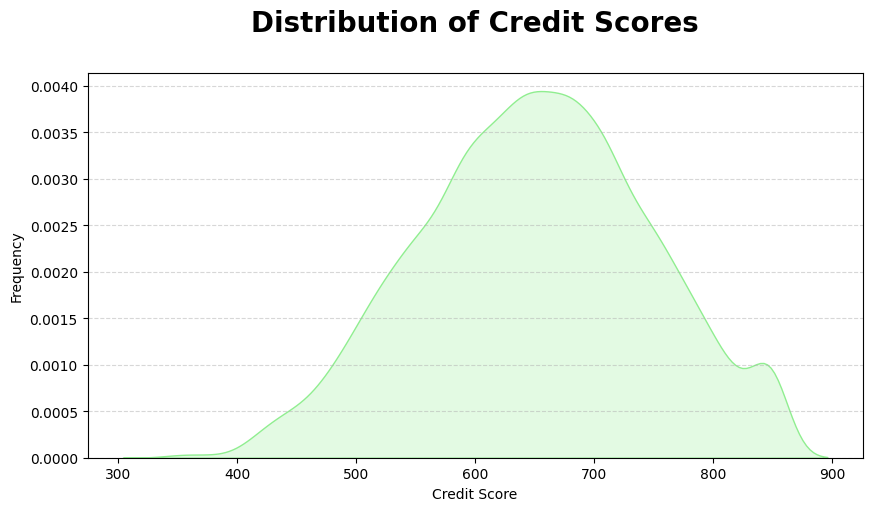

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['credit_score'], fill=True, color='lightgreen')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores', fontweight="black", fontsize=20, pad=30)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

- The plot shows the distribution of credit scores, with most scores concentrated around 600 and 700. The distribution is right-skewed, indicating fewer high scores, with very low scores being rare.
- It indicates most people have average credit scores, with fewer having high or very low scores.

In [9]:
geo_counts = data['country'].value_counts()
geo_df = pd.DataFrame(geo_counts).reset_index()
print(tabulate(geo_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════╤═════════╕
│ country   │   count │
╞═══════════╪═════════╡
│ France    │    5014 │
├───────────┼─────────┤
│ Germany   │    2509 │
├───────────┼─────────┤
│ Spain     │    2477 │
╘═══════════╧═════════╛


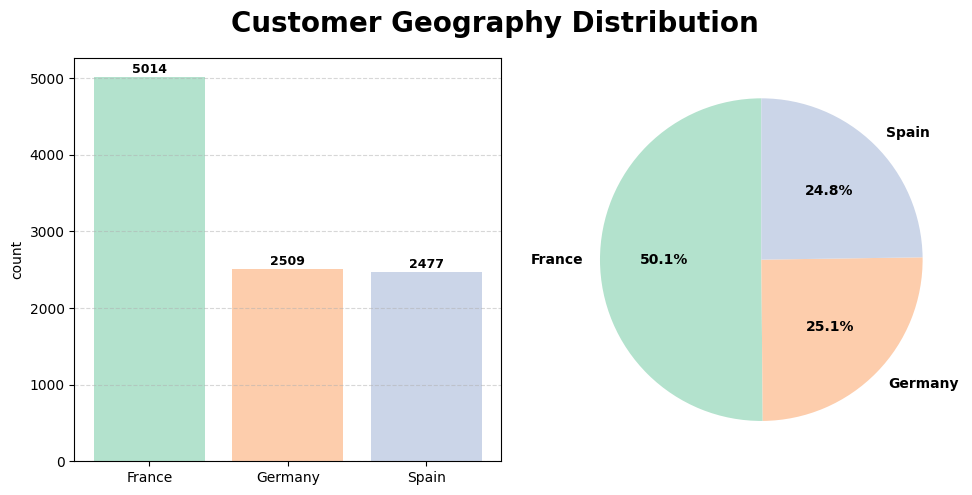

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Barplot
colors = plt.cm.Pastel2(range(len(geo_counts)))
bars = ax1.bar(geo_counts.index, geo_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax1.set_ylabel('count')
ax1.grid(True, linestyle='--', alpha=0.5, axis='y')

# Pie chart
ax2.pie(geo_counts.values, labels=geo_counts.index, autopct='%1.1f%%', colors=colors,
        textprops={'fontweight':'black'}, startangle=90)

fig.suptitle('Customer Geography Distribution', fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

In [11]:
gender_counts = data['gender'].value_counts()
gender_df = gender_counts.reset_index()
print(tabulate(gender_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════╤═════════╕
│ gender   │   count │
╞══════════╪═════════╡
│ Male     │    5457 │
├──────────┼─────────┤
│ Female   │    4543 │
╘══════════╧═════════╛


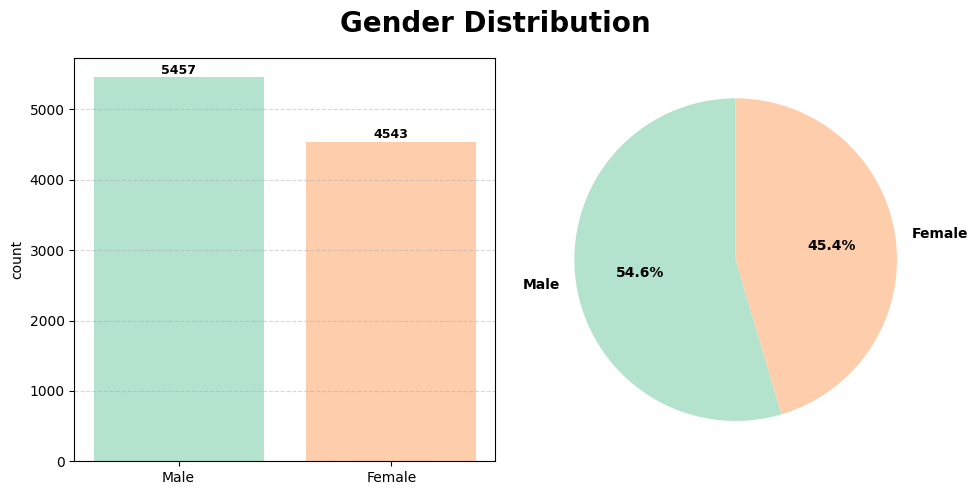

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Barplot
colors = plt.cm.Pastel2(range(len(geo_counts)))
bars = ax1.bar(gender_counts.index, gender_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax1.set_ylabel('count')
ax1.grid(True, linestyle='--', alpha=0.5, axis='y')

# Pie chart
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors,
        textprops={'fontweight':'black'}, startangle=90)

fig.suptitle('Gender Distribution', fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

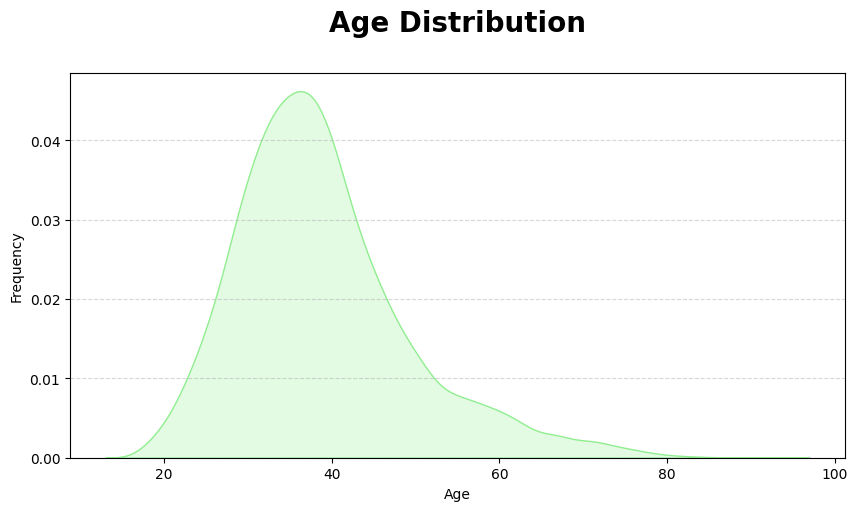

In [13]:
plt.figure(figsize=(10,5))
sns.kdeplot(data['age'], fill=True, color='lightgreen')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution', fontweight="black", fontsize=20, pad=30)
plt.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.show()

- The plot is concentrated around ages 30 to 40, with a peak at around age 40.
- This suggests that most customers are in their 30 and early 40, indicating a younger to middle ages population

In [14]:
tenure_counts = data['tenure'].value_counts()
tenure_df = pd.DataFrame(tenure_counts).reset_index()
print(tabulate(tenure_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════╤═════════╕
│   tenure │   count │
╞══════════╪═════════╡
│        2 │    1048 │
├──────────┼─────────┤
│        1 │    1035 │
├──────────┼─────────┤
│        7 │    1028 │
├──────────┼─────────┤
│        8 │    1025 │
├──────────┼─────────┤
│        5 │    1012 │
├──────────┼─────────┤
│        3 │    1009 │
├──────────┼─────────┤
│        4 │     989 │
├──────────┼─────────┤
│        9 │     984 │
├──────────┼─────────┤
│        6 │     967 │
├──────────┼─────────┤
│       10 │     490 │
├──────────┼─────────┤
│        0 │     413 │
╘══════════╧═════════╛


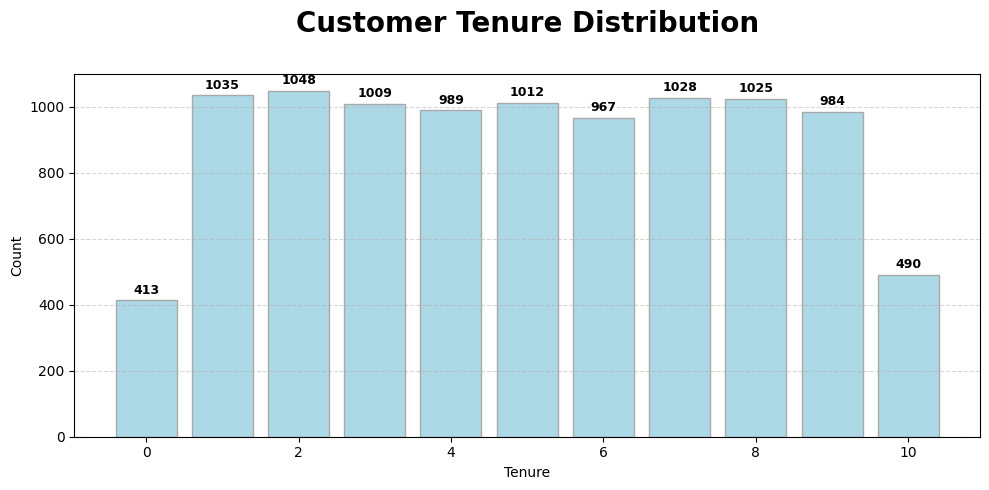

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

bars = ax.bar(tenure_counts.index, tenure_counts.values, color='lightblue', edgecolor='darkgray')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 20, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax.set_title('Customer Tenure Distribution', fontweight="black", fontsize=20, pad=30)
ax.set_ylabel('Count')
ax.set_xlabel('Tenure')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

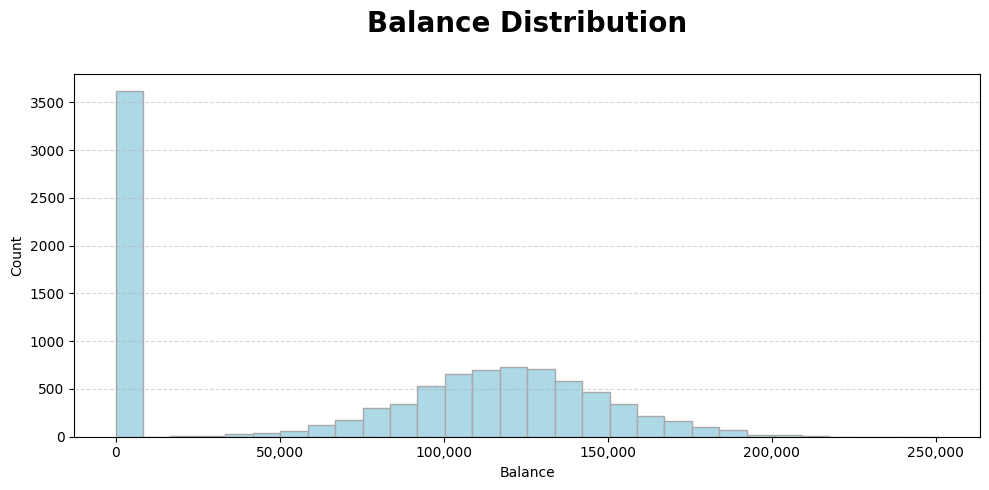

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(data['balance'], bins=30, color='lightblue', edgecolor='darkgray')

ax.set_title('Balance Distribution', fontweight="black", fontsize=20, pad=30)
ax.set_ylabel('Count')
ax.set_xlabel('Balance')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

- This plot shows a biomodal distribution of balances. The first peak is around zero, indicating many customers have low or no balance, while the second peak is around 100,000.
- This suggests a customer base with two distinct groups. Customers with lower balances may be more likely to churn, as low balances can indicate disengagement or lower financial commitment.

In [17]:
products_number_counts = data['products_number'].value_counts()
products_number_df = pd.DataFrame(products_number_counts).reset_index()
print(tabulate(products_number_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════╤═════════╕
│   products_number │   count │
╞═══════════════════╪═════════╡
│                 1 │    5084 │
├───────────────────┼─────────┤
│                 2 │    4590 │
├───────────────────┼─────────┤
│                 3 │     266 │
├───────────────────┼─────────┤
│                 4 │      60 │
╘═══════════════════╧═════════╛


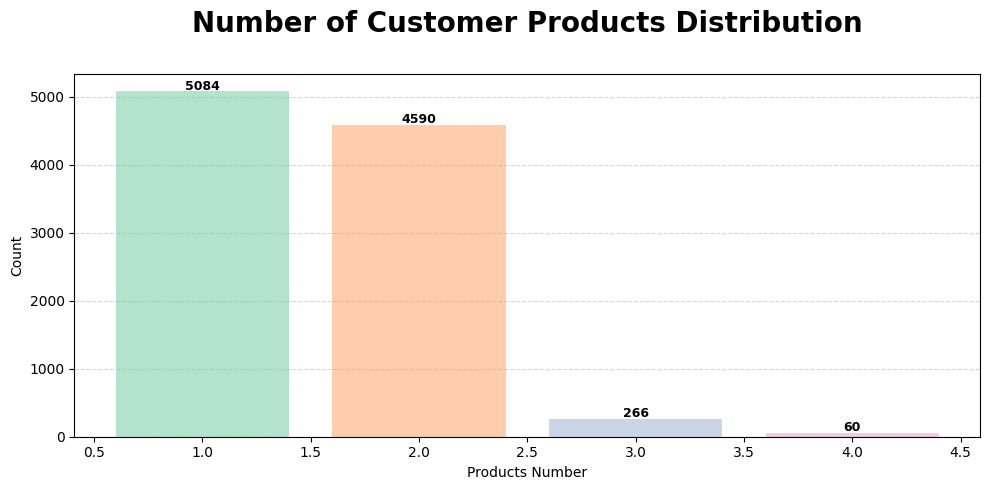

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

colors = plt.cm.Pastel2(range(len(products_number_counts)))
bars = ax.bar(products_number_counts.index, products_number_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 20, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax.set_title('Number of Customer Products Distribution', fontweight="black", fontsize=20, pad=30)
ax.set_ylabel('Count')
ax.set_xlabel('Products Number')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

In [19]:
credit_card_counts = data['credit_card'].value_counts()
credit_card_df = pd.DataFrame(credit_card_counts).reset_index()
print(tabulate(credit_card_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════╤═════════╕
│   credit_card │   count │
╞═══════════════╪═════════╡
│             1 │    7055 │
├───────────────┼─────────┤
│             0 │    2945 │
╘═══════════════╧═════════╛


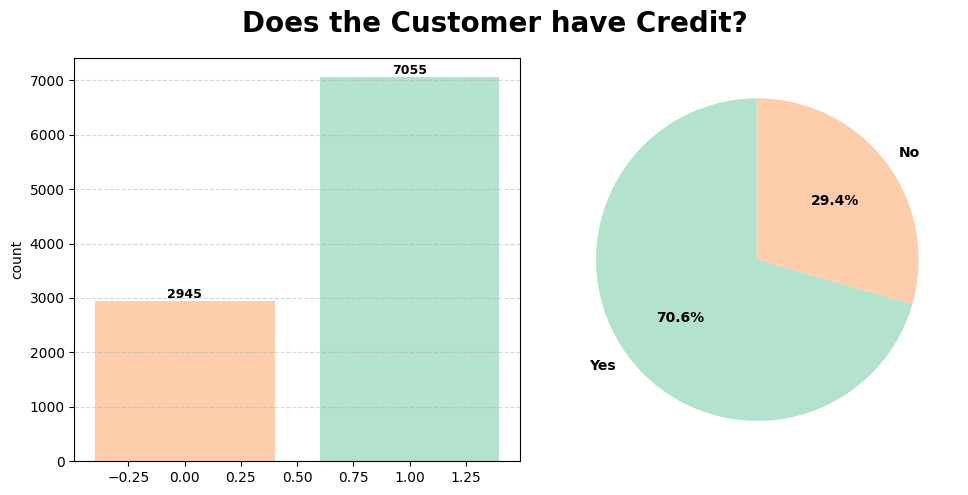

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Barplot
colors = plt.cm.Pastel2(range(len(credit_card_counts)))
bars = ax1.bar(credit_card_counts.index, credit_card_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax1.set_ylabel('count')
ax1.grid(True, linestyle='--', alpha=0.5, axis='y')

# Pie chart
ax2.pie(credit_card_counts.values, labels=['Yes', 'No'], autopct='%1.1f%%', colors=colors,
        textprops={'fontweight':'black'}, startangle=90)

fig.suptitle('Does the Customer have Credit?', fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

In [21]:
active_member_counts = data['active_member'].value_counts()
active_member_df = pd.DataFrame(active_member_counts).reset_index()
print(tabulate(active_member_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════╤═════════╕
│   active_member │   count │
╞═════════════════╪═════════╡
│               1 │    5151 │
├─────────────────┼─────────┤
│               0 │    4849 │
╘═════════════════╧═════════╛


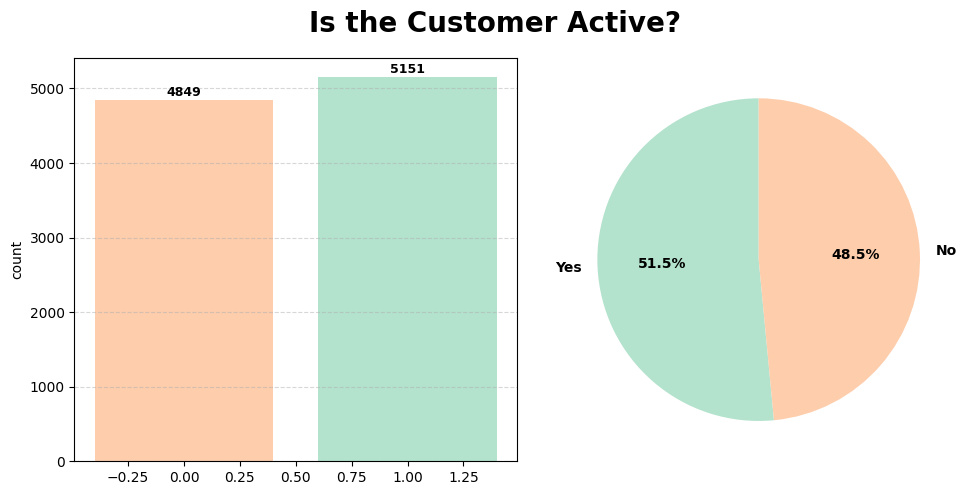

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Barplot
colors = plt.cm.Pastel2(range(len(active_member_counts)))
bars = ax1.bar(active_member_counts.index, active_member_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax1.set_ylabel('count')
ax1.grid(True, linestyle='--', alpha=0.5, axis='y')

# Pie chart
ax2.pie(active_member_counts.values, labels=['Yes', 'No'], autopct='%1.1f%%', colors=colors,
        textprops={'fontweight':'black'}, startangle=90)

fig.suptitle('Is the Customer Active?', fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

In [23]:
estimated_salary_counts = data['estimated_salary'].describe()
estimated_salary_df = pd.DataFrame(estimated_salary_counts).reset_index()
estimated_salary_df.columns = ['Statistic', 'Value']
print(tabulate(estimated_salary_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤═══════════╕
│ Statistic   │     Value │
╞═════════════╪═══════════╡
│ count       │  10000    │
├─────────────┼───────────┤
│ mean        │ 100090    │
├─────────────┼───────────┤
│ std         │  57510.5  │
├─────────────┼───────────┤
│ min         │     11.58 │
├─────────────┼───────────┤
│ 25%         │  51002.1  │
├─────────────┼───────────┤
│ 50%         │ 100194    │
├─────────────┼───────────┤
│ 75%         │ 149388    │
├─────────────┼───────────┤
│ max         │ 199992    │
╘═════════════╧═══════════╛


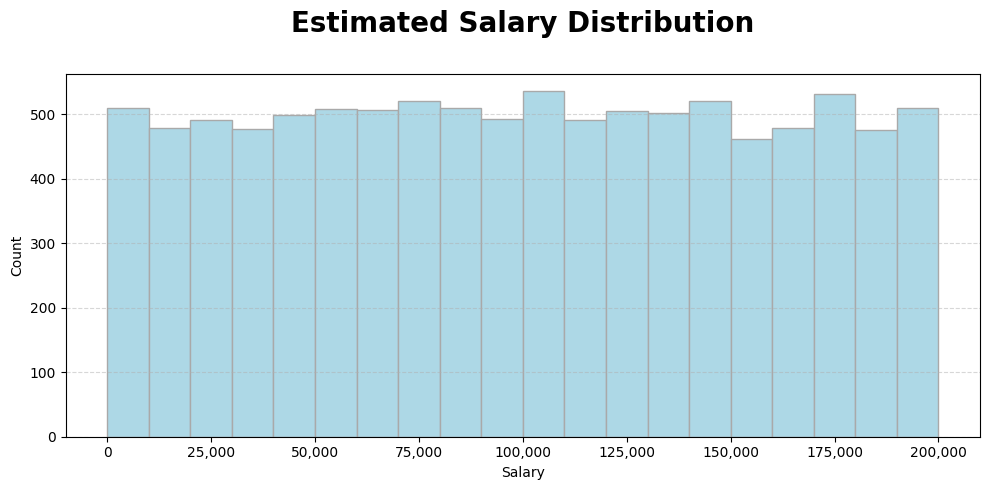

In [24]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(data['estimated_salary'], bins=20, color='lightblue', edgecolor='darkgray')

ax.set_title('Estimated Salary Distribution', fontweight="black", fontsize=20, pad=30)
ax.set_ylabel('Count')
ax.set_xlabel('Salary')
ax.grid(True, linestyle='--', alpha=0.5, axis='y')

# Format large x-axis numbers (Salary) with commas
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

- The plot indicates that the salaries of customers in the dataset are evenly distributed across the entire salary range from 0 to 200,000.
- There are no significant peaks, which suggests that customers have fairly similar probabilities of having any salary within this range.

In [25]:
churn_counts = data['churn'].value_counts()
chrun_df = pd.DataFrame(churn_counts).reset_index()
print(tabulate(chrun_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════╤═════════╕
│   churn │   count │
╞═════════╪═════════╡
│       0 │    7963 │
├─────────┼─────────┤
│       1 │    2037 │
╘═════════╧═════════╛


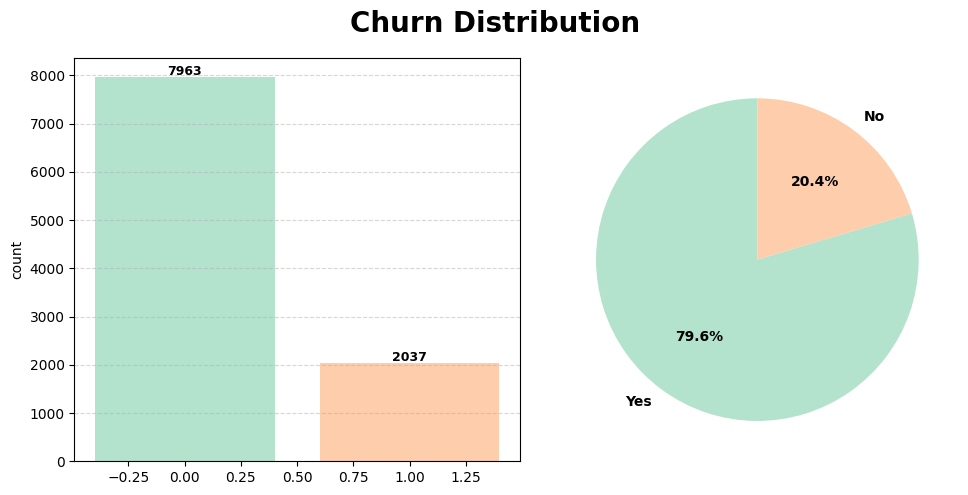

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Barplot
colors = plt.cm.Pastel2(range(len(churn_counts)))
bars = ax1.bar(churn_counts.index, churn_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center',
            fontweight="black", fontsize=9)

ax1.set_ylabel('count')
ax1.grid(True, linestyle='--', alpha=0.5, axis='y')

# Pie chart
ax2.pie(churn_counts.values, labels=['Yes', 'No'], autopct='%1.1f%%', colors=colors,
        textprops={'fontweight':'black'}, startangle=90)

fig.suptitle('Churn Distribution', fontweight="black", fontsize=20)

plt.tight_layout()
plt.show()

# Bivarate Analysis

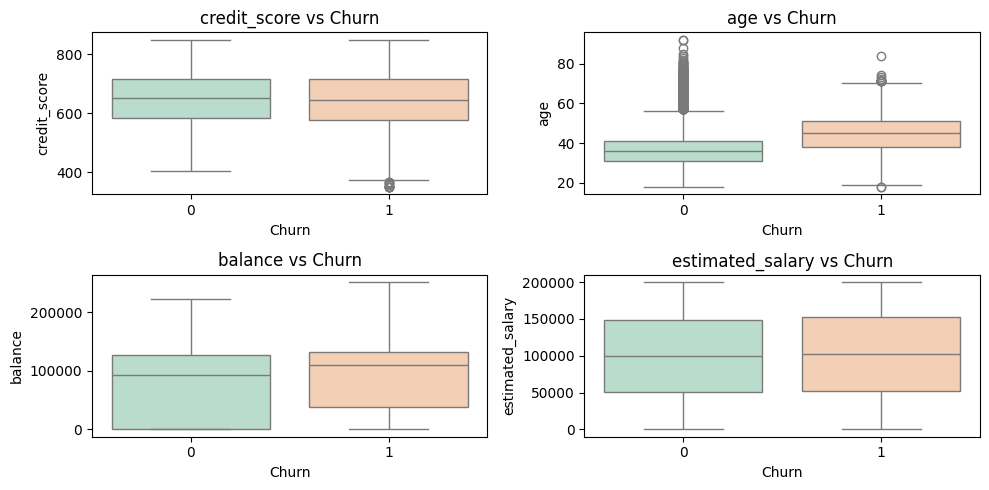

In [27]:
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary']

plt.figure(figsize=(10, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='churn', y=feature, data=data, palette='Pastel2')
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

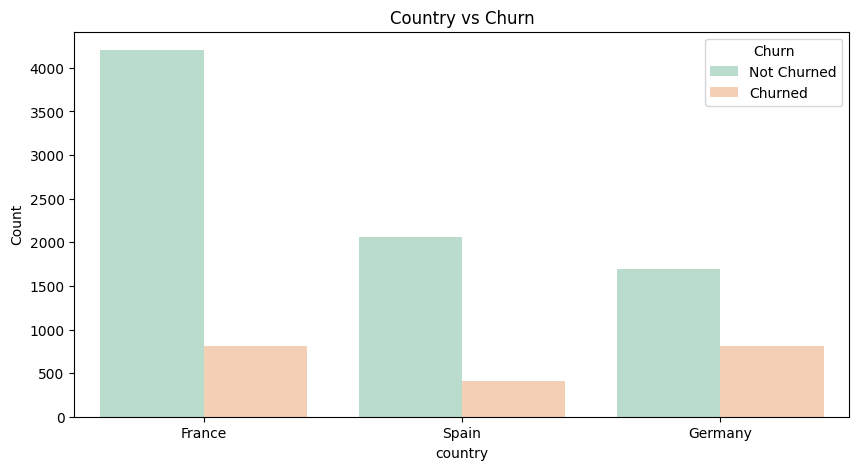

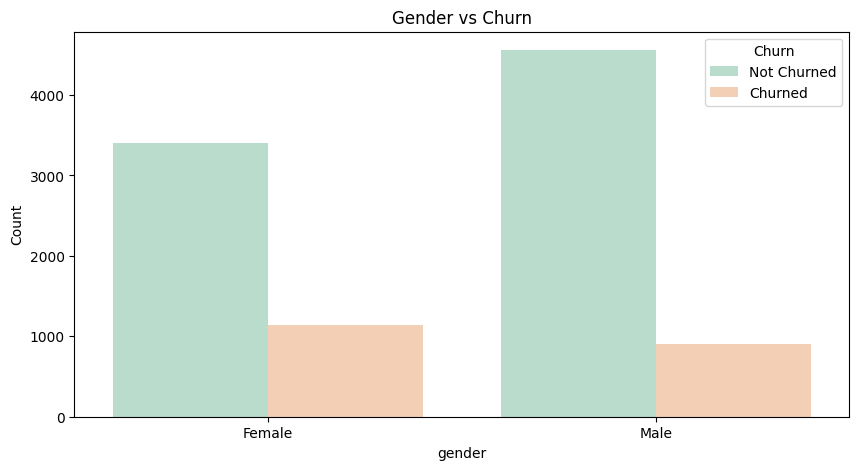

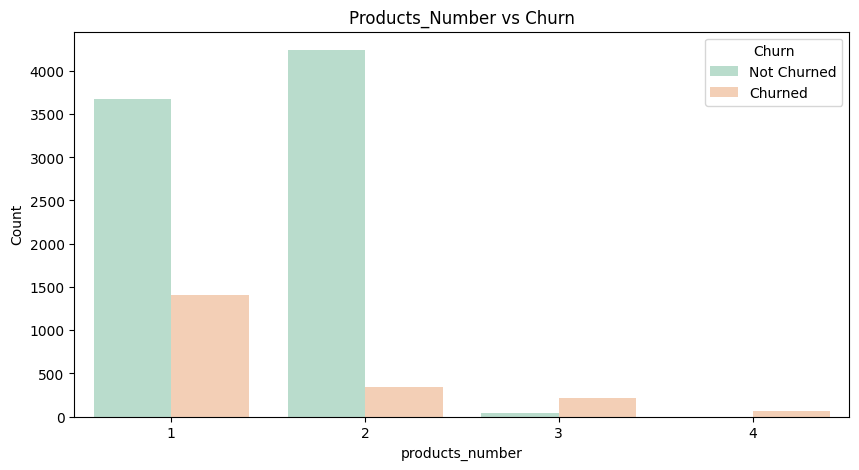

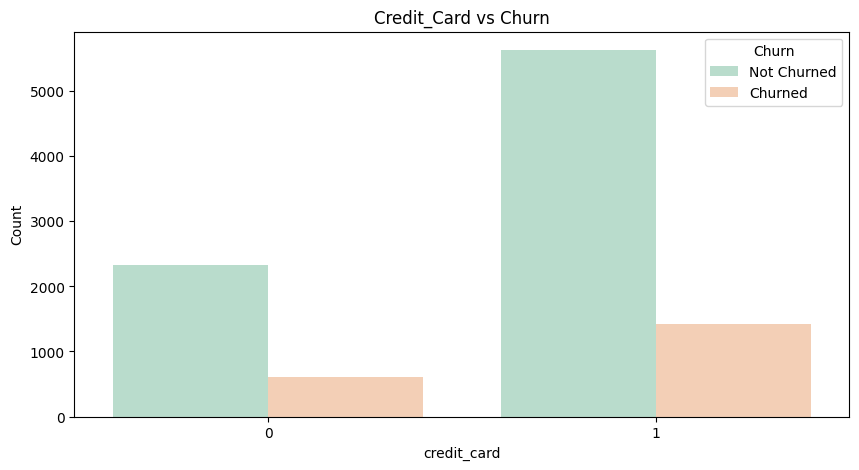

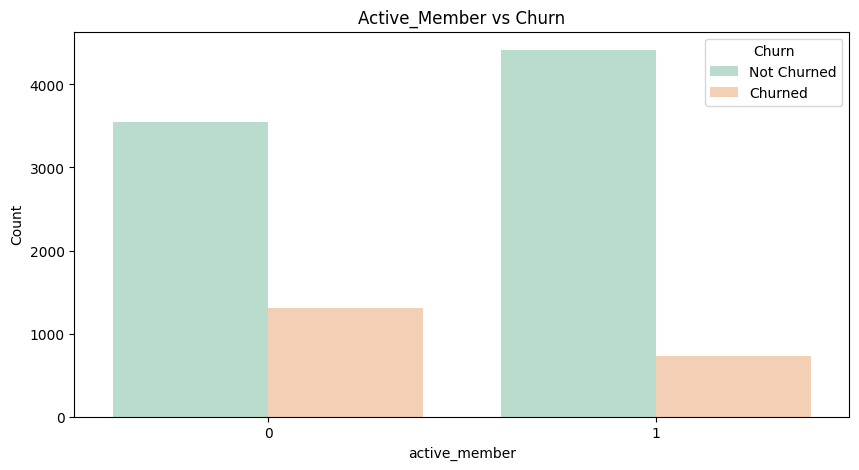

In [28]:
categorical_features = ['country', 'gender', 'products_number', 'credit_card',
                        'active_member']

for feature in categorical_features:
    plt.subplots(figsize=(10, 5))
    sns.countplot(x=feature, hue='churn', data=data, palette='Pastel2')
    plt.title(f'{feature.title()} vs Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right', labels=['Not Churned',
                                                         'Churned'])
    plt.show()

# Multivariate Analysis

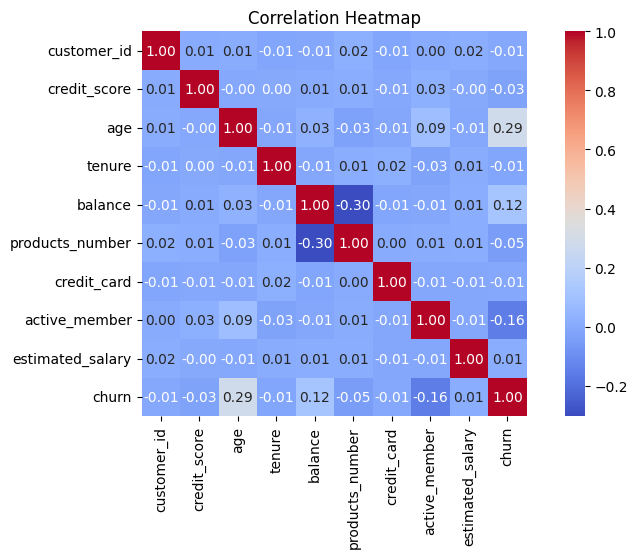

In [29]:
# Select numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()